## DB = Credit.csv
- class -> good | bad (pagador)

In [50]:
library(rpart)

data_ = read.csv("Credit.csv", stringsAsFactors=T)
dim(data_)
head(data_)

[1] 1000   21

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


### Criando amostras para treino (learning) e testes

In [51]:
# Criamos um vetor com mil instancias de elementos (1, 2)
# com respectiva probabilidade cada (0.7, 0.3)
# replace = T para gerar amostras independentes
amostra = sample(2, 1000, replace = T, prob = c(0.7, 0.3))
head(amostra, 30)

# usamos o vetor amostra para capturar dados isolados e aleatorios
# para treino e teste

# Importante
# A variavel de treino possuirá 70% (0.7) dos dados
datatreino = data_[amostra==1, ]
datateste = data_[amostra==2, ]
dim(datatreino)
dim(datateste)

[1] 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2

[1] 696  21

[1] 304  21

## Criando modelo com rpart( )
- method= -> Indica o tipo do modelo, no caso, classificação
- data= -> Utilizamos paenas os dados para treino
- . -> Inclui todos os atributos da DB para a relação

n= 696 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 696 212 good (0.30459770 0.69540230)  
    2) checking_status=<0,0<=X<200 371 167 good (0.45013477 0.54986523)  
      4) savings_status=<100,100<=X<500 296 145 bad (0.51013514 0.48986486)  
        8) duration>=22.5 130  45 bad (0.65384615 0.34615385)  
         16) purpose='new car',business,education,furniture/equipment,other,radio/tv,repairs 114  33 bad (0.71052632 0.28947368)  
           32) duration>=43.5 24   2 bad (0.91666667 0.08333333) *
           33) duration< 43.5 90  31 bad (0.65555556 0.34444444)  
             66) installment_commitment>=3.5 46  11 bad (0.76086957 0.23913043)  
              132) employment=<1,1<=X<4,unemployed 26   2 bad (0.92307692 0.07692308) *
              133) employment=>=7,4<=X<7 20   9 bad (0.55000000 0.45000000)  
                266) purpose='new car',education,furniture/equipment 11   2 bad (0.81818182 0.18181818) *
                267) purpose=business,o

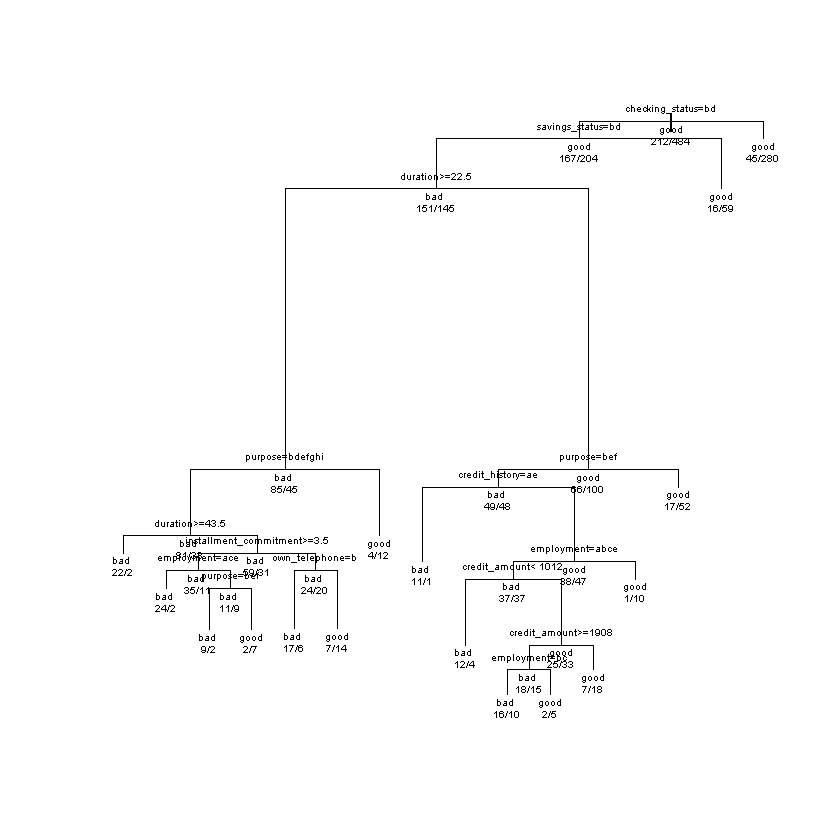

In [52]:
modelo = rpart(class ~ ., data=datatreino, method = 'class')
print(modelo)
plot(modelo)
text(modelo, use.n = T, all=T, cex=0.5)

## Previsões
- Usamos os dados para teste
- ifelse( ) -> Reorna resultado lógico

In [53]:
predicao = predict(modelo, newdata = datateste)

# retorna probabilidades
head(predicao)

# Criamos a coluna de previsão nos dados de teste
# Para comparação visual
cred = cbind(datateste, predicao)
head(cred)

# Criamos mais uma coluna com o resultado lógico do teste
cred['Result'] = ifelse(cred$bad >= 0.5, 'bad', 'good')
cred

,bad,good
9,0.1384615,0.86153846
11,0.2800000,0.72000000
16,0.9230769,0.07692308
18,0.2133333,0.78666667
19,0.2500000,0.75000000
24,0.2463768,0.75362319


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>
9,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,⋯,none,own,1,'unskilled resident',1,none,yes,good,0.1384615,0.86153846
11,0<=X<200,12,'existing paid','new car',1295,<100,<1,3,'female div/dep/mar',none,⋯,none,rent,1,skilled,1,none,yes,bad,0.2800000,0.72000000
16,<0,24,'existing paid',radio/tv,1282,100<=X<500,1<=X<4,4,'female div/dep/mar',none,⋯,none,own,1,'unskilled resident',1,none,yes,bad,0.9230769,0.07692308
18,<0,30,'no credits/all paid',business,8072,'no known savings',<1,2,'male single',none,⋯,bank,own,3,skilled,1,none,yes,good,0.2133333,0.78666667
19,0<=X<200,24,'existing paid','used car',12579,<100,>=7,4,'female div/dep/mar',none,⋯,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad,0.2500000,0.75000000
24,0<=X<200,12,'critical/other existing credit','used car',1804,100<=X<500,<1,3,'male single',none,⋯,none,own,1,skilled,1,none,yes,good,0.2463768,0.75362319


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good,Result
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>
9,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,⋯,own,1,'unskilled resident',1,none,yes,good,0.1384615,0.86153846,good
11,0<=X<200,12,'existing paid','new car',1295,<100,<1,3,'female div/dep/mar',none,⋯,rent,1,skilled,1,none,yes,bad,0.2800000,0.72000000,good
16,<0,24,'existing paid',radio/tv,1282,100<=X<500,1<=X<4,4,'female div/dep/mar',none,⋯,own,1,'unskilled resident',1,none,yes,bad,0.9230769,0.07692308,bad
18,<0,30,'no credits/all paid',business,8072,'no known savings',<1,2,'male single',none,⋯,own,3,skilled,1,none,yes,good,0.2133333,0.78666667,good
19,0<=X<200,24,'existing paid','used car',12579,<100,>=7,4,'female div/dep/mar',none,⋯,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad,0.2500000,0.75000000,good
24,0<=X<200,12,'critical/other existing credit','used car',1804,100<=X<500,<1,3,'male single',none,⋯,own,1,skilled,1,none,yes,good,0.2463768,0.75362319,good
30,<0,60,'delayed previously',business,6836,<100,>=7,3,'male single',none,⋯,own,2,skilled,1,yes,yes,bad,0.9166667,0.08333333,bad
31,0<=X<200,18,'existing paid',business,1913,>=1000,<1,3,'male mar/wid',none,⋯,own,1,skilled,1,yes,yes,good,0.2133333,0.78666667,good
33,0<=X<200,18,'existing paid','new car',5866,100<=X<500,1<=X<4,2,'male single',none,⋯,own,2,skilled,1,yes,yes,good,0.6153846,0.38461538,bad


## Matriz de Confusão
- Utilize as metricas (calculos) para obter resultados

In [54]:
confusao = table(cred$class, cred$Result)
confusao

# Métricas
taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)
taxaacerto

      
       bad good
  bad   27   61
  good  24  192

[1] 0.7203947